# **CODESOFT**
#**Data Science - Internship**
# **Author : Afnan Ansari**
# **Task No 1 : Titanic Survival Prediction**


*   *Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data*
*   *The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived*


### **Supervised Learning** -> Using Logistic Regression
### **Dataset Link** => (https://www.kaggle.com/datasets/brendan45774/test-file)



# **1) COLLECTING DATA**

*Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

*Loading Data*

In [ ]:
data = pd.read_csv("Titanic_Dataset_Full.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 # **2) DATA ANALYSIS**

**Note:**

*   *Insights of the visualizations is written below the graphs and plotings.*
*   *And insights of without visualized things are also written below the outputs.*
*   *And code explanation is written above the code cell*





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


*Checking Null Values*

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Graphs**

*   HeatMap
*   Histogram
*   Count Graph





*Heatmap Of Null Values*

<Axes: >

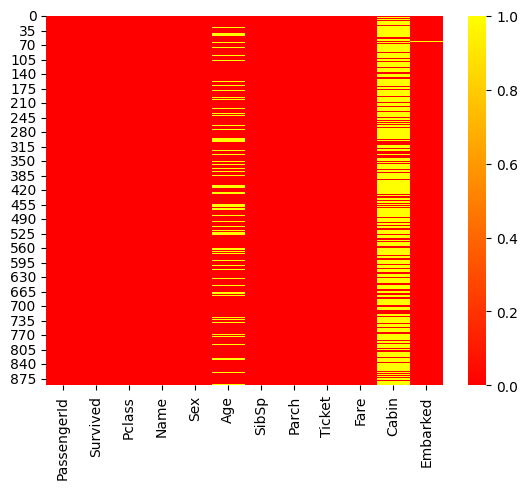

In [ ]:
sns.heatmap(data.isnull(), cmap = 'autumn')

*Histogram Of Age Count*

<Axes: xlabel='Age', ylabel='Count'>

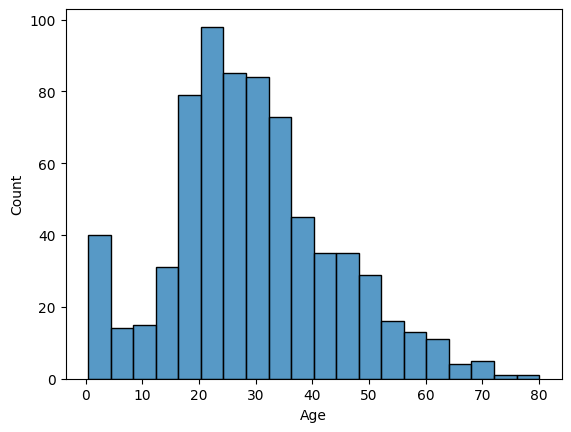

In [ ]:
sns.histplot(data , x = 'Age')

**Insights:**
1.   *Highest age  group was of 20 to 35 Years old people.*
2.   *least age group was of 70 to 80 years old people.*

*Histogram For Fare*

<Axes: ylabel='Frequency'>

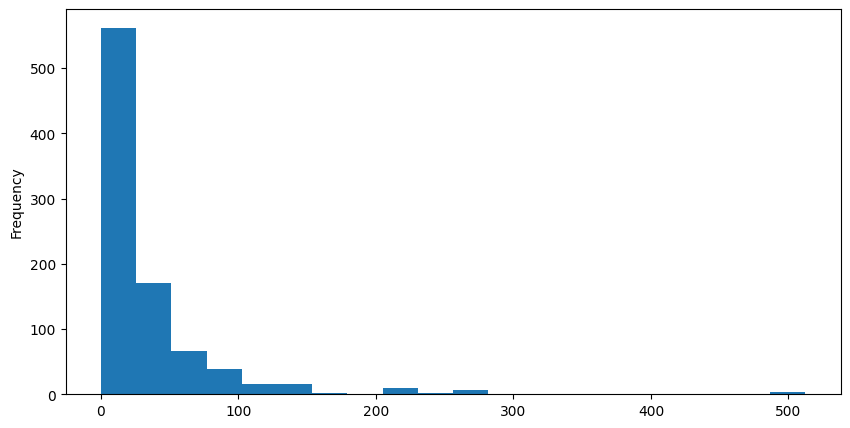

In [ ]:
# sns.histplot(data , x = 'Fare', bins=20,figsize=(10,5))

data['Fare'].plot.hist(bins=20,figsize=(10,5))

**Insights:**
1.   *Almost 85% of the people paid Rs.0 to Rs.100.*
2.   *There were very fews people who paid Rs.500.*

*Graph for Counting Survival Rate According to the Passenger Class*

<Axes: xlabel='Survived', ylabel='count'>

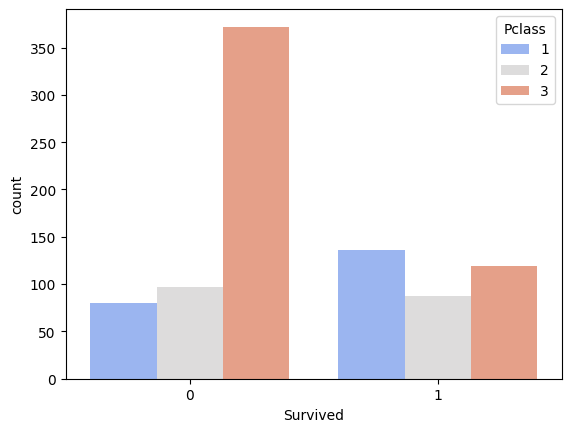

In [ ]:
sns.countplot(data , x = 'Survived' , hue = 'Pclass' , palette = 'coolwarm')

**Insights:**
1.   *Death Ratio of 3 class passenger was so high and there survival rate was so low*
2.   *While 2 class passenger death and survival ratio was around 55 45*
3.   *And the 1 class passenger's death and survival ratio was 70 30*

***-> The higher the Passenger class more higher your chances of survival are.***

*Count Graph For Visualizing Gender Acording to the Passenger Class*

<Axes: xlabel='Sex', ylabel='count'>

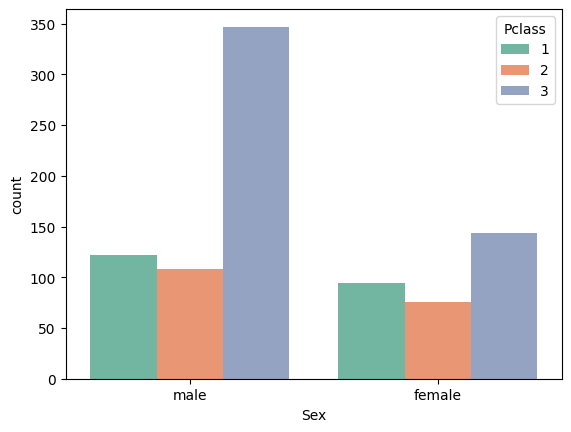

In [ ]:
sns.countplot(data , x = 'Sex' , hue = 'Pclass', palette = 'Set2')

**Insights:**
1.   *In passenger class 3 -> Most of them were Male. Male female ratio in passenger class 3 was around 65 35*
2.   *In passenger class 2 -> Most of them were Male. Male female ratio in passenger class 2 was around 60 40*
3.   *In passenger class 1 -> Most of them were Male. Male female ratio in passenger class 1 was around 55 45*


*Count Graph for Survival Rate According to the Sibling Spouse Count*

<Axes: xlabel='Survived', ylabel='count'>

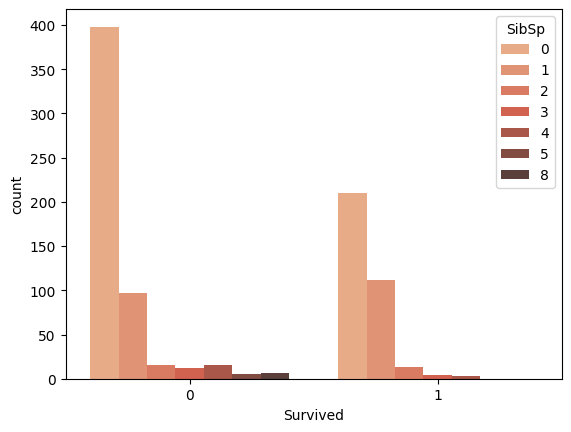

In [ ]:
sns.countplot(data , x = 'Survived' , hue = 'SibSp' , palette = 'OrRd_d')

**Insights:**
1.   *Most of the People where single with no sibling spouse and their survival ratio is high as compare to others and there death ratio is high too as compare to others.*
2.   *while people with 5+ sibling spouse count were all dead*
3.   *Survival Ratio decrease as the sibling spouse count increases from 1*


*Count Graph for Sibling and Spouse Count*

<Axes: xlabel='SibSp', ylabel='count'>

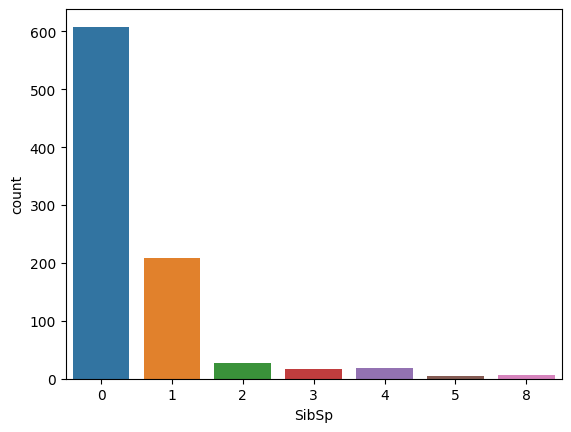

In [ ]:
 sns.countplot(data , x = 'SibSp')

**Insights:**
1.   *Around 600 People were single with no sibling spouse.*
2.   *200 people were having sibling spouse count 1.*
3.   *While there were so few people with 1+ sibling spouse count.*
4.   *Highest Sibling spouse count was of 8*


# **3) DATA WRANGLING**


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Dropping Unwanted Columns*

In [ ]:
data = data.drop(columns = ["PassengerId","Name" , "Ticket" , "Cabin"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*Changing Gender Into Binary ( Male == 1 and Female == 0 )*

In [ ]:
data.Sex = (data['Sex'] == 'male' ).astype(int)

*Converting Embarked Catagories (C,S,Q) into Numbers (0,1,2)*

In [ ]:
cat = {"Embarked": {"Q":0, "S":1, "C":2}}
data = data.replace(cat)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


*Finding Mean of Age, Fare and Embarked For Filling the Null Values with Mean*

In [ ]:
age_mean = data.Age.mean()
print("Mean Value Of Age Column is => ",age_mean)

Mean Value Of Age Column is =>  29.69911764705882


In [ ]:
fare_mean = data.Fare.mean()
print("Mean Value Of Fare Column is => ",fare_mean)

Mean Value Of Fare Column is =>  32.204207968574636


In [ ]:
Embarked_mean = data.Embarked.mean()
print("Mean Value Of Embarked Column is => ",Embarked_mean)

Mean Value Of Embarked Column is =>  1.1023622047244095


*Updating Mean Values into Null Cells of Age, Fare and Embarked For Filling the Null Values*

In [ ]:
data['Age'].fillna(age_mean, inplace = True)

In [ ]:
data['Fare'].fillna(fare_mean, inplace = True)

In [ ]:
data['Embarked'].fillna(Embarked_mean, inplace = True)

*Checking Total Null Values*

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# embarked = pd.get_dummies(data['Embarked'], drop_first=True)
# Pclass = pd.get_dummies(data['Pclass'], drop_first=True)
# Sex = pd.get_dummies(data['Sex'], drop_first=True)

# data = pd.concat([data,embarked , Pclass , Sex] , axis = 1)
# data

*Checking Total Unique Values For Each Columns*

In [ ]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      4
dtype: int64

In [ ]:
# data = data.drop(columns = ["Embarked","Pclass" , "Sex"])

# **4) TRAINNING AND TESTING**

*Using Logistic Regression For Model as we want out Predictions to be in Binary*

In [ ]:
Model = LogisticRegression()

MinMax Scaler For Scaling Our Values Between 1 and 0.
Using [fit_transform](https://www.educative.io/answers/what-is-the-use-of-fittransform-from-sklearn-in-python#:~:text=The%20fit_transform%20method%20from%20the,parameters%20to%20standardize%20the%20data.) for Converting and Fitting the Values of Given Columns.

In [ ]:
columns = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked']
scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[columns])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.5
1,1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0
2,1,1.0,0.0,0.321438,0.000,0.0,0.015469,0.5
3,1,0.0,0.0,0.434531,0.125,0.0,0.103644,0.5
4,0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.5


In [ ]:
# X_data = scaler.fit_transform(X)
# Y_data = scaler.fit_transform(Y)
# Y_train,Y_test = scaler.fit_transform(Y_train),scaler.transfrom(Y_test)



*   *Separating our Independent and Dependent Columns.*

*   *X = Independent = All Columns Except Survived Columnn Because We Need to Predict this.*
*   *Y = Dependent = Survived Column.*


*   *Using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) For Spliting our Dataset into 25% For Testing and 75% for Training.*

In [ ]:
X = data.drop('Survived' , axis = 1)
Y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1, shuffle = True)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.5
1,1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0
2,1,1.0,0.0,0.321438,0.000,0.0,0.015469,0.5
3,1,0.0,0.0,0.434531,0.125,0.0,0.103644,0.5
4,0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.5


*Fitting the Training Dataset Values into our Model(Logistic Regression).*

In [ ]:
Model.fit(X_train,Y_train)

LogisticRegression()

# **5) PREDICTION.**

*Predicting on Test Dataset.*

In [ ]:
predict_Y = Model.predict(X_test)
predict_Y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

*Creating Confusion Matrix*

In [ ]:
CM = confusion_matrix(predict_Y , Y_test)
CM

array([[113,  31],
       [ 15,  64]])

*Creating Heatmap of Confusion Matrix.*

<Axes: >

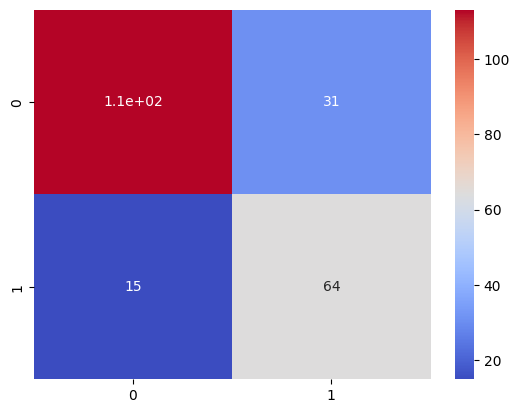

In [ ]:
sns.heatmap(CM , annot = True , cmap = 'coolwarm')

*Checking Accuracy, Sensitivity(Recalling) and Precision Through Confusion Matrix.*

In [ ]:
TP = CM[1, 1]  # True Positives
TN = CM[0, 0]  # True Negatives
FP = CM[0, 1]  # False Positives
FN = CM[1, 0]  # False Negatives

accuracy = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = (TP) / (TP + FN)
Precision = (TP) / (TP + FP)

print("Accuracy :", accuracy*100)
print("Sensitivity :", Sensitivity*100)
print("Precision :", Precision*100)

Accuracy : 79.37219730941703
Sensitivity : 81.0126582278481
Precision : 67.36842105263158
